### APPLICATION OF VADER SENTIMENT ANALYZER  TO NEWS DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #plot the sentiment on a chart
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer #perform sentiment analysis 
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Giulia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data=pd.read_csv('TUTTE_NEWS_clean.csv', sep=";", index_col=False)

In [3]:
pd.set_option('display.max_colwidth',None)
data

,date,headline
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy"
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO)
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy
...,...,...
74993,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data"
74994,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight"
74995,2020-08-28,White House interviewing replacements for FTC head - Politico
74996,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's


In [4]:
vader = SentimentIntensityAnalyzer() 

#compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

# Iterate through the headlines and get the polarity scores using vader
f = lambda title: vader.polarity_scores(title)['compound']
data['compound'] = data['headline'].apply(f)

data

,date,headline,compound
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106
...,...,...,...
74993,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106
74994,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779
74995,2020-08-28,White House interviewing replacements for FTC head - Politico,0.0000
74996,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000


In [5]:
data['date'] = pd.to_datetime(data['date'])
data

,date,headline,compound
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106
...,...,...,...
74993,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106
74994,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779
74995,2020-08-28,White House interviewing replacements for FTC head - Politico,0.0000
74996,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000


In [6]:
data.date.dt.month #OK, I HAVE DATA TILL AUGUST

0        1
1        1
2        1
3        1
4        1
        ..
74993    8
74994    8
74995    8
74996    8
74997    8
Name: date, Length: 74998, dtype: int64

COMPUTE AVG OF COMPOUND SCORE FOR EACH DAY

In [7]:
mean_df = data.groupby("date").mean()

In [8]:
mean_df

,compound
date,
2020-01-01,0.169288
2020-01-02,0.144309
2020-01-03,0.107039
2020-01-04,0.012900
2020-01-05,-0.014406
...,...
2020-08-24,0.048212
2020-08-25,0.061023
2020-08-26,0.062438


In [9]:
mean_df.rename(columns = {'compound':'vader_score'}, inplace = True)
mean_df

,vader_score
date,
2020-01-01,0.169288
2020-01-02,0.144309
2020-01-03,0.107039
2020-01-04,0.012900
2020-01-05,-0.014406
...,...
2020-08-24,0.048212
2020-08-25,0.061023
2020-08-26,0.062438


In [10]:
mean_df.to_csv('sentiment_index/news_vader_score.csv')

COUNT NUMBER OF NEWS PER EACH DAY

In [27]:
n_news = data.groupby("date")['headline'].count()
n_news.to_frame().to_csv('n_day_news.csv')

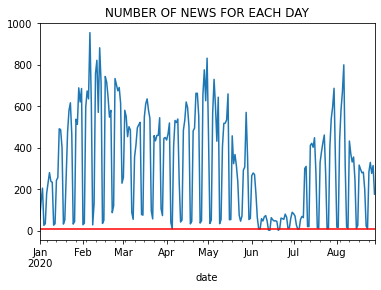

In [12]:
n_news.plot()
plt.title("NUMBER OF NEWS FOR EACH DAY")
plt.axhline(10, color='red')

COUNT NUMBER OF NEWS PER EACH MONTH

In [13]:
n_news.index #DATA TILL AUGUST

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', name='date', length=241, freq=None)

Text(0.5, 1.0, 'NUMBER OF NEWS FOR EACH MONTH')

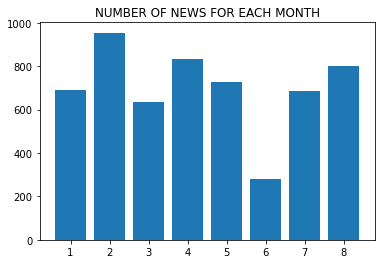

In [26]:
plt.bar(n_news.index.month,n_news)
plt.title("NUMBER OF NEWS FOR EACH MONTH")

PLOT THE VADER SENTIMENT SCORES FOR NEWS DATASET

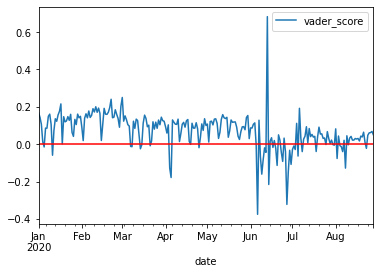

In [15]:
mean_df.plot()
plt.axhline(0, color='red')

In [16]:
d2=mean_df.groupby(mean_df.index.month).mean() #avg of each month
d2

,vader_score
date,
1,0.111562
2,0.152898
3,0.095949
4,0.071032
5,0.099223
6,-0.017300
7,0.031757
8,0.020772


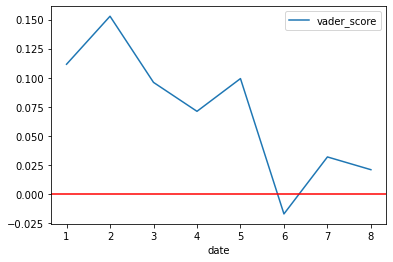

In [17]:
d2.plot()
plt.axhline(0, color='red')

CREATION OF VADER LABELS (POSITIVE, NEUTRAL, NEGATIVE) WITH A COMPOUND TRESHOLD OF [ -0.025, +0.025 ]

In [18]:
def format_output(output_dict):
  
    polarity = "neutral"

    if output_dict['compound']>= 0.025:
        polarity = "positive"

    elif output_dict['compound']<= -0.025:
        polarity = "negative"

    return polarity

def predict_sentiment(text):
  
    output_dict =  vader.polarity_scores(text)
    return format_output(output_dict)

# Run the predictions
data["vader_prediction"] = data["headline"].apply(predict_sentiment)

data.rename(columns = {'compound':'vader_score'}, inplace = True)
data.rename(columns = {'vader_prediction':'vader_label'}, inplace = True)

# Show 5 random rows of the data
data.sample(5)

,date,headline,vader_score,vader_label
54640,2020-05-18,How to Trade Powell's Comments on Economy With ETFs,0.00,neutral
58077,2020-06-01,"Fiat Chrysler to list robot-making business after PSA merger. Fiat Chrysler (FCA) said it planned to list robot making business, giving more detail on Monday about the future of Turin-based Comau, which it already planned to spin off.",0.34,positive
56373,2020-05-26,Automotive Brake Master Cylinder Market â€”â€¦â€”â€¦-â€”â€¦â€”9 Size And Forecast ...,0.00,neutral
37700,2020-04-07,Earnings Preview: Commerce Bancshares (CBSH) Q1 Earnings Expected to Decline,0.00,neutral
11650,2020-02-06,Knoll Declares Cash Dividend,0.00,neutral


In [19]:
data

,date,headline,vader_score,vader_label
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430,negative
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625,positive
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588,positive
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486,positive
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106,positive
...,...,...,...,...
74993,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106,positive
74994,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779,positive
74995,2020-08-28,White House interviewing replacements for FTC head - Politico,0.0000,neutral
74996,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000,neutral


In [20]:
data['vader_label'].value_counts()

neutral     33603
positive    29879
negative    11516
Name: vader_label, dtype: int64

In [21]:
data['vader_label'].value_counts(normalize=True) #MUCH BETTER RESULTS THAN WITH PREVIOUS (NOT CLEANED) DATA

neutral     0.448052
positive    0.398397
negative    0.153551
Name: vader_label, dtype: float64

In [22]:
data

,date,headline,vader_score,vader_label
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430,negative
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625,positive
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588,positive
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486,positive
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106,positive
...,...,...,...,...
74993,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106,positive
74994,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779,positive
74995,2020-08-28,White House interviewing replacements for FTC head - Politico,0.0000,neutral
74996,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000,neutral


In [23]:
data.to_csv('sentiment_analysis_results/news_vader_senti_after_cl.csv', index=False, encoding='utf-8-sig')